In [1]:
import dask
dask.config.set(scheduler='processes')

In [2]:
#from soda.dataio.suntans.sunpy import Spatial
import xarray as xr
import dask
import glob
from netCDF4 import Dataset
import numpy as np


from soda.dataio.suntans.sunxray import Sundask
from soda.utils.myproj import MyProj
from soda.utils.otherplot import axcolorbar

import matplotlib.animation as animation
from IPython.display import HTML

from matplotlib import rcParams

#rcParams['font.family'] = 'sans-serif'
#rcParams['font.sans-serif'] = ['Bitstream Vera Sans']
#rcParams['font.serif'] = ['Bitstream Vera Sans']
rcParams["font.size"] = "14"
rcParams['axes.labelsize']='large'

import matplotlib.pyplot as plt

#plt.rcParams['animation.ffmpeg_path'] = '/pawsey/sles12sp3/tools/broadwell/gcc/4.8.5/ffmpeg/3.4/bin/ffmpeg'
#plt.rcParams['axes.labelsize'] = 'large'
#plt.rcParams["font.size"] = "14"
#mpl.verbose.set_level("helpful")

#%matplotlib inline

In [3]:
#ncfiles = '../SCENARIOS/OUTPUT_NWS_2km_hex_2013_2014/NWS_2km_20130701_20130731_3D_Harmonics.nc.*'
#ncfiles = '../SCENARIOS/OUTPUT_NWS_2km_hex_2013_2014/NWS_2km_20130716_20130815_3D_Harmonics.nc.*'
#ncfiles = '../SCENARIOS/OUTPUT_NWS_2km_hex_2013_2014/NWS_2km_20130731_20130830_3D_Harmonics.nc.*'
# ncfiles = '../SCENARIOS/OUTPUT_NWS_2km_hex_2013_2014/NWS_2km_20130701_20130801_3D_ModeAmp.nc.*'
# ncfiles = '../SCENARIOS/OUTPUT_NWS_2km_hex_2013_2014/NWS_2km_20140301_20140401_3D_ModeAmp.nc.*'
# ncfiles = '../SCENARIOS/OUTPUT_NWS_2km_hex_2013_2014/NWS_2km_20140501_20140601_3D_ModeAmp.nc.*'
ncfiles = '../SCENARIOS/OUTPUT_NWS_2km_hex_2019/NWS_2km_20190201_20190303_3D_ModeAmp.nc.*'

In [4]:
sun = Sundask(ncfiles, timedim='Ntide')
sun._ds

Time dimension Ntide
converting variable: xp
converting variable: yp


<xarray.Dataset>
Dimensions:   (Nc: 976, Ne: 3116, Nk: 100, Nkw: 101, Nmode: 4, Np: 454016, Ntide: 5, numsides: 8, two: 2)
Coordinates:
    xv        (Nc) float64 dask.array<chunksize=(976,), meta=np.ndarray>
    yv        (Nc) float64 dask.array<chunksize=(976,), meta=np.ndarray>
    xe        (Ne) float64 dask.array<chunksize=(3116,), meta=np.ndarray>
    ye        (Ne) float64 dask.array<chunksize=(3116,), meta=np.ndarray>
    Nk        (Nc) int32 dask.array<chunksize=(976,), meta=np.ndarray>
Dimensions without coordinates: Nc, Ne, Nkw, Nmode, Np, Ntide, numsides, two
Data variables:
    xp        (Np) float64 dask.array<chunksize=(454016,), meta=np.ndarray>
    yp        (Np) float64 dask.array<chunksize=(454016,), meta=np.ndarray>
    lonv      (Nc) float64 dask.array<chunksize=(976,), meta=np.ndarray>
    latv      (Nc) float64 dask.array<chunksize=(976,), meta=np.ndarray>
    lonp      (Np) float64 dask.array<chunksize=(454016,), meta=np.ndarray>
    latp      (Np) float64 dask.

In [5]:
%%time
sun.calc_all_properties()

CPU times: user 14.9 s, sys: 1.23 s, total: 16.1 s
Wall time: 43.2 s


In [6]:
sun._FillValue

999999

In [8]:
dhdx, dhdy = sun.calc_grad(sun.dv)

In [9]:
# Set the projection
P = MyProj('merc')
sun.xp, sun.yp = P.to_ll(sun.xp, sun.yp)
sun.xv, sun.yv = P.to_ll(sun.xv, sun.yv)
sun._xy = None # reset this

(-22.5, -7.5)

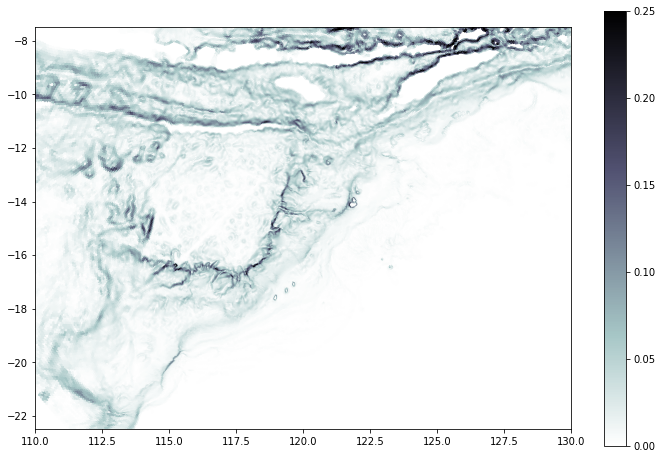

In [12]:
plt.figure(figsize=(12,8))
fig,ax,cf,cb = sun.plotcelldata(np.abs(dhdx+1j*dhdy), cmap='bone_r', vmax=0.25)
plt.xlim(110,130)
plt.ylim(-22.5,-7.5)


In [11]:
month = 'Feb 2019'
mode = 0
con = 0
titlestr = r'$A_{M2,%d}(%s\,x,y)$ [m]'%(mode+1,month)
outfile = '../FIGURES/Amp_M2_Mode%s_%s.png'%(mode+1,month)

In [9]:
amp_re = sun.load_data('amp_b_re',)
amp_im = sun.load_data('amp_b_im',)

amp = np.abs(amp_re + 1j*amp_im)

In [12]:
amp_re.shape

(5, 4, 225368)

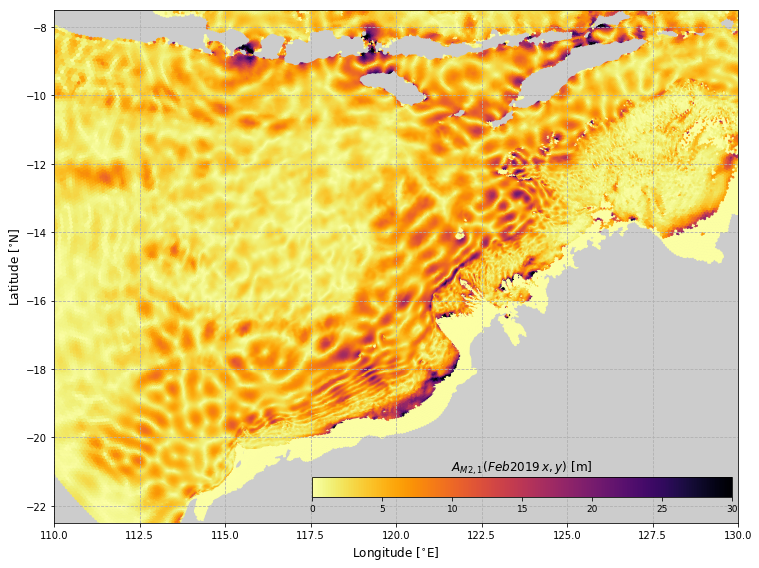

../FIGURES/Amp_M2_Mode1_Feb 2019.png


In [13]:

plt.figure(figsize=(12,8))
ax=plt.subplot(111, facecolor='0.8')
fig,ax,cf,cb = sun.plotcelldata(amp[con,mode,:], cmap='inferno_r',vmin=0, vmax=30, colorbar=False)

#sun.contourf(sun.dv, clevs = [200.,1000.], filled=False, colors='k', linewidths=0.5)

plt.grid(ls='--',b=True)
#title = ax.text(125,-19.5,titlestr)

plt.ylabel('Latitude [$^{\circ}$N]')
plt.xlabel('Longitude [$^{\circ}$E]')

plt.xlim(110,130)
plt.ylim(-22.5,-7.5)
cb=axcolorbar(cf, pos=[0.4,0.05,0.5,0.04])
cb.ax.set_title(titlestr)

plt.savefig(outfile, dpi=150)
plt.show()
print(outfile)

In [28]:
sun._xy


[array([[12899406.651996,  -968831.442121],
        [12898295.449195,  -966794.157208],
        [12896015.852794,  -966226.301571],
        [12893661.561236,  -968741.745468],
        [12894049.248689,  -970955.202354]]),
 array([[12854655.850907,  -960899.377377],
        [12853466.72301 ,  -958910.468269],
        [12851674.544239,  -958314.011958],
        [12848629.421162,  -959558.455974],
        [12847851.991328,  -961137.006798],
        [12849049.57224 ,  -964324.598601]]),
 array([[12861803.437023,  -952515.989855],
        [12863951.710506,  -951241.678842],
        [12863874.079632,  -947709.503597],
        [12860979.039525,  -946238.446206],
        [12858174.123358,  -948075.690335],
        [12858237.426141,  -951267.134783]]),
 array([[12866839.067415,  -952562.542896],
        [12869859.023952,  -949622.056699],
        [12869512.703274,  -947360.939646],
        [12866730.816916,  -945695.39178 ],
        [12863874.079632,  -947709.503597],
        [12863951.710506, 